In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df["benign"] = breast_cancer.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df["benign"].value_counts()

benign
1    357
0    212
Name: count, dtype: int64

In [17]:
majority_df = df[df["benign"] == 1]
minority_df = df[df["benign"] == 0]
minority_downsampled_df = resample(minority_df, replace=True, n_samples=30, random_state=42)
downsampled_df = pd.concat([majority_df, minority_downsampled_df])

In [18]:
y = downsampled_df["benign"]
X = downsampled_df.drop("benign", axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
forest = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')
forest.fit(X_train)

IsolationForest()

In [44]:
normal

Index([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78,
       80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96],
      dtype='int64')

In [41]:
y_pred = forest.predict(X_test)
anomaly_score = forest.decision_function(X_test)


data = pd.DataFrame({
    "prediction": y_pred,
    "anomaly_score": anomaly_score
})
normal = data[data['prediction'] == 1]
anomalies = data[data['prediction'] == -1]


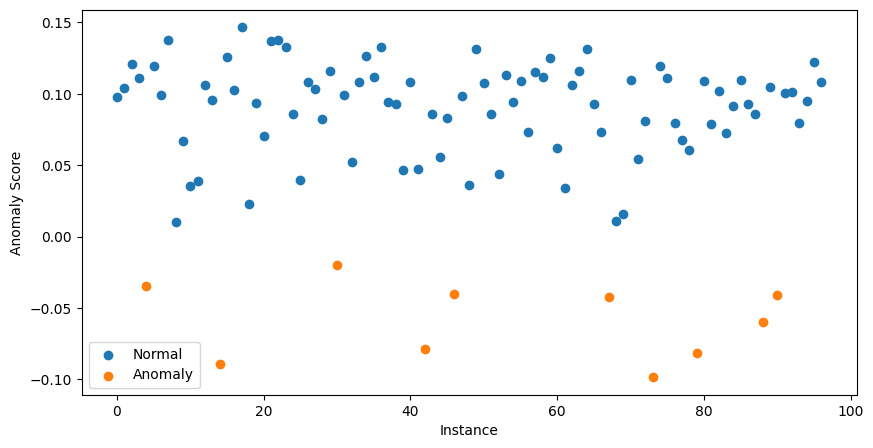

In [50]:
plt.figure(figsize=(10, 5))

plt.scatter(normal.index, normal['anomaly_score'], label='Normal')
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()